## Importing basic librairies 

In [1]:
import pandas as pd
import json
import math
from fire import Fire
from PIL import Image
import numpy as np

### Defining prime numbers 

In [2]:
def is_prime(n):
    if n == 2:
        return True

    if n < 2 or n % 2 == 0:
        return False

    for i in range(3, 1 + int(math.sqrt(n)), 2):
        if (n % i) == 0:
            return False

    return True



def primes(n):
    p = [2]
    for i in range(3, n, 2):
        if is_prime(i) is True:
            p.append(i)

    return p

In [3]:
## Example for prime numbers between 1 and 100.
primes (100)

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

### Creating ulam spiral images 

In [4]:
## We create our spiral images and we save them, so we will apply our CNN

def ula(n, outputpath):
    image = Image.new("L", (n + 4, n + 4))
    pix = image.load()
    directions_str = ["up", "right", "down", "left"]
    directions = [(0, -1), (1, 0), (0, 1), (-1, 0)]

    direction = 3
    length = 0
    turn_length = 1
    color = 0
    position = (int(n / 2), int(n / 2))
    print(position)
    prime_count = 0
    for i in range(0, n * n):
        if is_prime(i) is True:
            color = 0
            prime_count += 1
        else:
            color = 255
        image.putpixel(position, (color))
        length += 1

        if length >= turn_length:
            direction = (direction + 1) % 4

            length = 1
            if (direction % 2) == 0:
                turn_length += 1

        position = (
            position[0] + directions[direction][0],
            position[1] + directions[direction][1],
        )

    image.putpixel((int(n / 2), int(n / 2)), 128)

    image.save(outputpath)


#if __name__ == "__main__":
    #Fire(ula)

### We create random images with random sizes  and we save it in a specific folder.

In [5]:
## We created a vector taille as the target vector for the regression
import random
taille = []
d=0
## We choose 50 random images from 1 to 100 diffrent n sizes  
m=50
for i in range(m):
    n = random.randint(1, 100)
    taille.append(n)
    ## We can choose any location to save the image files
    outputpath = '/Users/migueljosebernalmora/Test_start_up/file_%d.jpg'%d
    ula(n, outputpath)
    d+=1


(37, 37)
(31, 31)
(9, 9)
(17, 17)
(4, 4)
(15, 15)
(34, 34)
(30, 30)
(40, 40)
(19, 19)
(33, 33)
(25, 25)
(47, 47)
(29, 29)
(36, 36)
(22, 22)
(24, 24)
(46, 46)
(12, 12)
(7, 7)
(48, 48)
(28, 28)
(3, 3)
(26, 26)
(24, 24)
(5, 5)
(49, 49)
(9, 9)
(25, 25)
(24, 24)
(11, 11)
(37, 37)
(11, 11)
(2, 2)
(23, 23)
(31, 31)
(26, 26)
(3, 3)
(48, 48)
(8, 8)
(18, 18)
(5, 5)
(18, 18)
(35, 35)
(6, 6)
(38, 38)
(45, 45)
(37, 37)
(40, 40)
(4, 4)


In [6]:
taille

[75,
 62,
 18,
 35,
 8,
 31,
 69,
 61,
 81,
 39,
 66,
 50,
 95,
 59,
 73,
 45,
 48,
 93,
 24,
 14,
 97,
 56,
 6,
 53,
 48,
 11,
 99,
 18,
 50,
 49,
 22,
 75,
 23,
 4,
 47,
 62,
 52,
 7,
 97,
 17,
 36,
 10,
 37,
 71,
 12,
 77,
 90,
 75,
 81,
 8]

### We build our libraries for an CNN 

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

In [8]:
# for loading/processing the images  

from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model,  Sequential, load_model

In [9]:
input_image = '/Users/migueljosebernalmora/Test_start_up/file_0.jpg'

In [10]:
# load the image as a 224x224 array
ima = load_img(input_image, target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
ima = np.array(ima)

print(ima.shape)
(224, 224, 3)

(224, 224, 3)


(224, 224, 3)

In [11]:
reshaped_ima = ima.reshape(1,224,224,3)
print(reshaped_ima.shape)
(1, 224, 224, 3)

(1, 224, 224, 3)


(1, 224, 224, 3)

In [12]:
reshaped_ima = reshaped_ima.astype('float32')

In [13]:
x = preprocess_input(reshaped_ima)

## Running model VGG16 for a classification and Regression model

In [14]:
model = VGG16()

In [15]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [16]:
features = model.predict(x)
print(features.shape)

(1, 4096)


### For all the files 

In [17]:
n_files = m
output = []
d=0
for i in range(n_files):
    # load the image as a 224x224 array
    files = '/Users/migueljosebernalmora/Test_start_up/file_%d.jpg'%d
    img = load_img(files, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    output.append(features)
    d+=1

In [18]:
feat = np.array(output)

In [19]:
feat.shape

(50, 1, 4096)

In [20]:
features_ = feat.reshape(-1,4096)

In [21]:
features_.shape

(50, 4096)

## K means

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

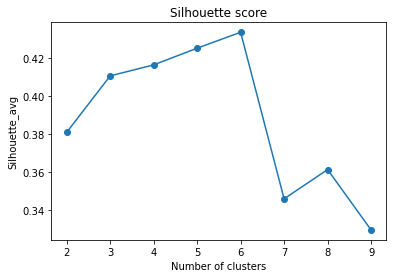

In [23]:
# Silhouette score, number of clusters selection.
# On voit un maximun coefficient silhouette à 6 clusters.
range_n_clusters = range(2, 10)
silhouettes = []
for num_clusters in range_n_clusters:
    cls = KMeans(num_clusters, n_init=20, init='k-means++')
    cluster_labels = cls.fit_predict(features_)
    silhouette_avg = silhouette_score(features_, cluster_labels)
    silhouettes.append(silhouette_avg)
plt.plot(range(2, 10), silhouettes, marker='o')
plt.title("Silhouette score")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette_avg")
plt.show()

## Transformation TSE 

In [24]:
from sklearn import manifold

In [25]:
# On utilise à TSNE à 6 clusters, pour faire un analiyze complet il faut associer des ettiquettes.
tsne = manifold.TSNE(n_components=2)
X_trans_cnn = tsne.fit_transform(features_)

In [26]:
num_clusters = 6

In [27]:
clust_cnn = KMeans(num_clusters, n_init=20, init='k-means++').fit(X_trans_cnn)

In [28]:
import seaborn as sns
sns.set()

/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


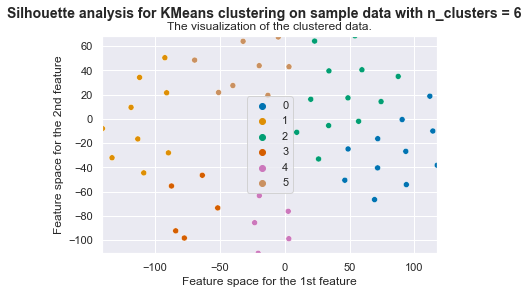

In [29]:

# for 6 clusters
sns.scatterplot(X_trans_cnn[:, 0],X_trans_cnn[:, 1], hue=clust_cnn.labels_, palette='colorblind')        
plt.xlim([np.min(X_trans_cnn[:, 0]), np.max(X_trans_cnn[:, 0])])
plt.ylim([np.min(X_trans_cnn[:, 1]), np.max(X_trans_cnn[:, 1])])
plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 6),
             fontsize=14, fontweight='bold')

plt.show()

In [30]:
clust_cnn.labels_

array([2, 2, 1, 1, 4, 1, 0, 2, 2, 5, 2, 5, 0, 2, 2, 5, 5, 0, 1, 3, 0, 2,
       4, 2, 5, 3, 0, 1, 5, 5, 1, 2, 1, 4, 5, 0, 2, 4, 0, 3, 1, 3, 1, 0,
       3, 0, 0, 2, 0, 4], dtype=int32)

## Regression Random Forest

In [31]:
 X_matrix=features_
 Y = pd.DataFrame(taille)   

In [32]:
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_matrix,Y,test_size=0.3)

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()

In [35]:
param_grid={'n_estimators':[10,100,200,300,500],'min_samples_leaf':[1,3,5,7,10]}

In [36]:
from sklearn import model_selection

CV_rfc=model_selection.GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)

In [37]:
CV_rfc.fit(x_train, y_train)

/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-pack

/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-pack

/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-pack

/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-pack

/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/migueljosebernalmora/anaconda3/lib/python3.7/site-pack

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 3, 5, 7, 10],
                         'n_estimators': [10, 100, 200, 300, 500]})

In [38]:
CV_rfc.best_params_

{'min_samples_leaf': 1, 'n_estimators': 100}

In [39]:
rfc_ok=CV_rfc.best_estimator_

In [40]:
y_pred_rfc=rfc_ok.predict(x_test)

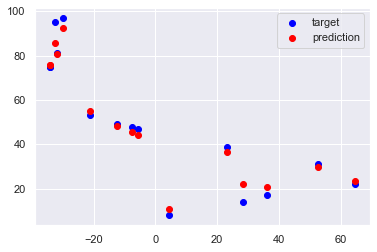

In [41]:
## On voit un tres bonne prediction dans notre model
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_adjust=pca.fit_transform(x_test)
plt.scatter(x_adjust[:,0],y_test,c='blue',label='target')
plt.scatter(x_adjust[:,0],y_pred_rfc,c='red',label='prediction')
plt.legend()

In [42]:
y_pred_rfc.shape

(15,)

In [43]:
y_pred_rfc = y_pred_rfc.reshape(15,1)

In [44]:
y_pred_rfc= pd.DataFrame(y_pred_rfc)
y_pred_rfc

,0
0,85.65
1,80.67
2,48.12
3,44.37
4,36.65
5,45.66
6,75.67
7,29.80
8,23.34
9,21.93


In [45]:
y_test = pd.DataFrame(y_test)
y_test

,0
12,95
8,81
29,49
34,47
9,39
16,48
0,75
5,31
30,22
19,14


In [46]:
## On voit que l'erreur il pas très où on a des resultats de prediction.

score_RFmultD = rfc_ok.score(x_test, y_test)
mse_RFmultD = mean_squared_error(y_test, y_pred_rfc)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_RFmultD, mse_RFmultD, np.sqrt(mse_RFmultD)))

R2:0.981, MSE:14.78, RMSE:3.84
